# **Importing Necessary Modules**

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

---



In [ ]:
df = pd.read_csv("bms_train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.shape

(8523, 12)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [ ]:
df["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [ ]:
df["Outlet_Establishment_Year"].nunique()

9

In [ ]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [ ]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat","Low Fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")

# **Checking for NULL Values**

---



In [ ]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
w_med = df["Item_Weight"].median()
print(w_med)
df["Item_Weight"] = df["Item_Weight"].fillna(w_med)

12.6


In [ ]:
df["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
os_mode = df["Outlet_Size"].mode()[0]
print(os_mode)
df["Outlet_Size"] = df["Outlet_Size"].fillna(os_mode)

Medium


In [ ]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# **Data Visualisation**

---



<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

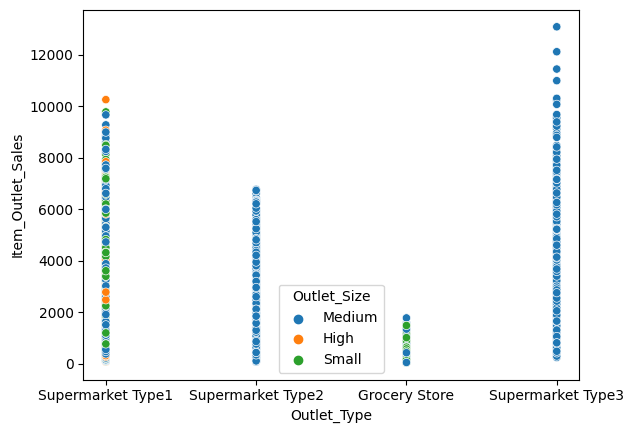

In [ ]:
sns.scatterplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df, hue="Outlet_Size")

<Axes: xlabel='Outlet_Type', ylabel='count'>

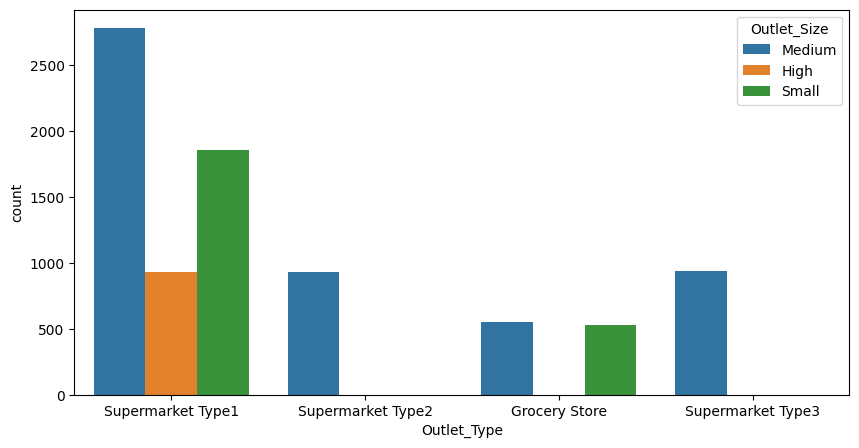

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Type", data=df, hue="Outlet_Size")

<Axes: xlabel='Outlet_Type', ylabel='count'>

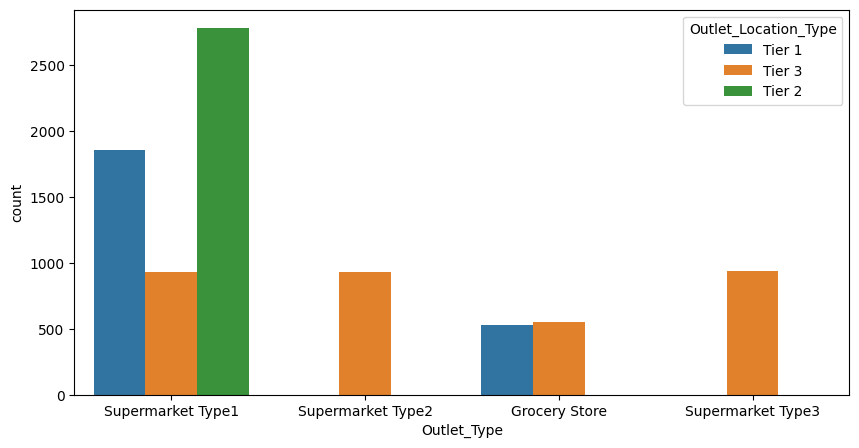

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="Outlet_Type", data=df, hue="Outlet_Location_Type")

<Axes: xlabel='Outlet_Establishment_Year', ylabel='count'>

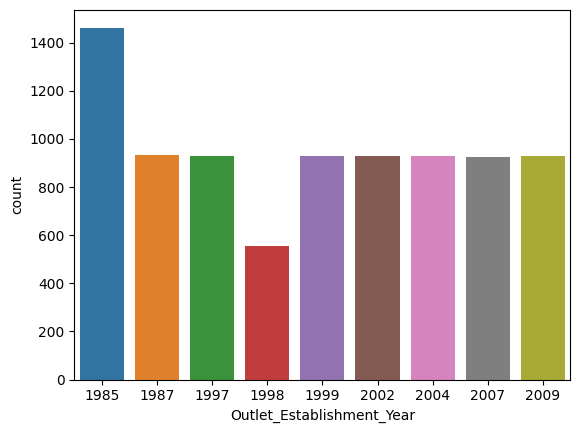

In [ ]:
sns.countplot(x="Outlet_Establishment_Year", data=df)

<ipython-input-124-cc7cc258d046>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Blues")


<Axes: >

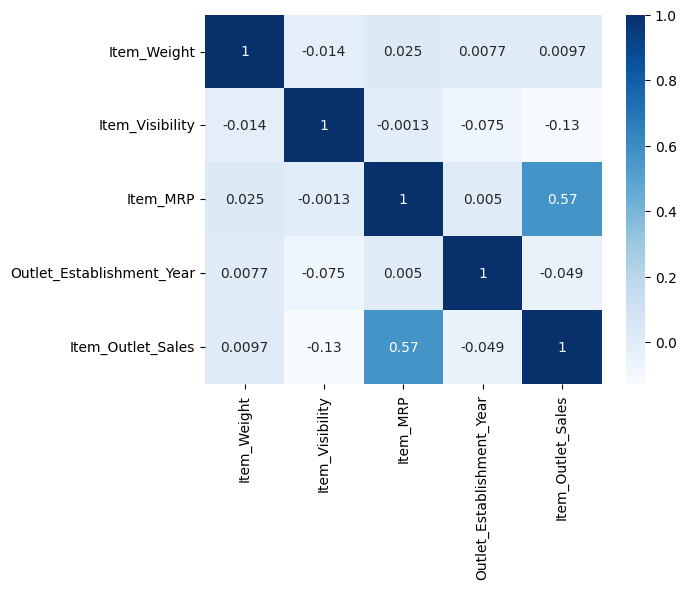

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

# **Outlier Detection**

---



<Axes: >

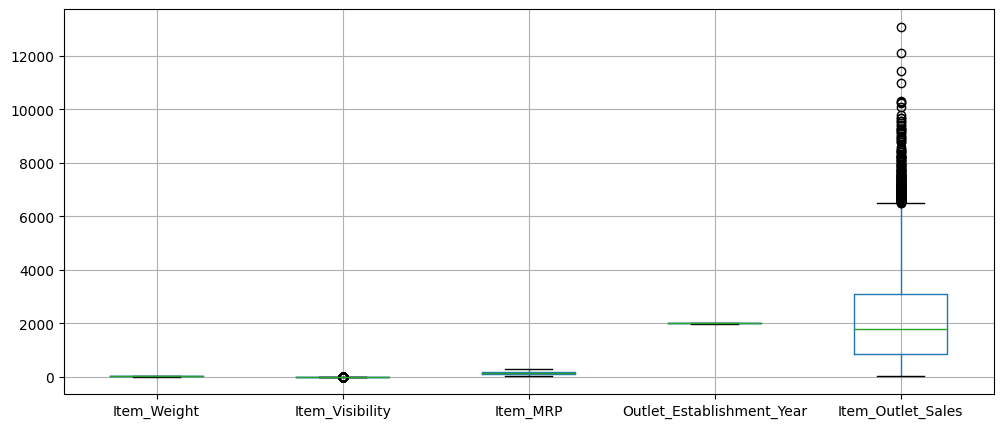

In [ ]:
plt.figure(figsize=(12,5))
df.boxplot()

<Axes: xlabel='Item_Visibility'>

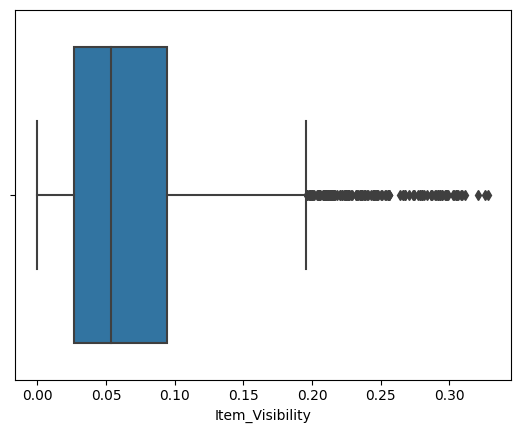

In [ ]:
sns.boxplot(x = df["Item_Visibility"])

In [ ]:
iv_q1 = df["Item_Visibility"].quantile(0.25)
iv_q3 = df["Item_Visibility"].quantile(0.75)
iv_iqr = iv_q3 - iv_q1

iv_ul = iv_q3 + 1.5*iv_iqr

print("Item_Visibility Upper Limit: ", iv_ul)

Item_Visibility Upper Limit:  0.195979015


In [ ]:
df["Item_Visibility"][df["Item_Visibility"] > iv_ul].count()

144

In [ ]:
iv_outlier_idx = df[df["Item_Visibility"] > iv_ul].index
iv_outlier_idx

Int64Index([  49,   83,  108,  174,  334,  434,  502,  521,  532,  680,
            ...
            7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432, 8509],
           dtype='int64', length=144)

In [ ]:
df.drop(index = iv_outlier_idx, inplace=True)

In [ ]:
df.shape

(8379, 12)

# **Splitting into Dependent & Independent Variables**

---



In [ ]:
drop_cols = ["Item_Identifier", "Outlet_Identifier", "Item_Outlet_Sales"]

In [ ]:
X = df.drop(drop_cols, axis=1)
y = df["Item_Outlet_Sales"]

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1


In [ ]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

# **Label Encoding**

---



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
X["Item_Fat_Content"].value_counts()

Low Fat    5432
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [ ]:
ifc_le = LabelEncoder()
X["Item_Fat_Content"] = ifc_le.fit_transform(X["Item_Fat_Content"])

In [ ]:
X["Item_Type"].value_counts()

Fruits and Vegetables    1208
Snack Foods              1181
Household                 897
Frozen Foods              845
Dairy                     670
Canned                    638
Baking Goods              631
Health and Hygiene        516
Soft Drinks               439
Meat                      418
Breads                    248
Hard Drinks               211
Others                    167
Starchy Foods             143
Breakfast                 106
Seafood                    61
Name: Item_Type, dtype: int64

In [ ]:
it_le = LabelEncoder()
X["Item_Type"] = it_le.fit_transform(X["Item_Type"])

In [ ]:
X["Outlet_Size"].value_counts()

Medium    5136
Small     2311
High       932
Name: Outlet_Size, dtype: int64

In [ ]:
os_le = LabelEncoder()
X["Outlet_Size"] = os_le.fit_transform(X["Outlet_Size"])

In [ ]:
X["Outlet_Location_Type"].value_counts()

Tier 3    3283
Tier 2    2785
Tier 1    2311
Name: Outlet_Location_Type, dtype: int64

In [ ]:
olt_le = LabelEncoder()
X["Outlet_Location_Type"] = olt_le.fit_transform(X["Outlet_Location_Type"])

In [ ]:
X["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store         939
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
ot_le = LabelEncoder()
X["Outlet_Type"] = ot_le.fit_transform(X["Outlet_Type"])

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,0,0.016047,4,249.8092,1999,1,0,1
1,5.92,1,0.019278,14,48.2692,2009,1,2,2
2,17.50,0,0.016760,10,141.6180,1999,1,0,1
3,19.20,1,0.000000,6,182.0950,1998,1,2,0
4,8.93,0,0.000000,9,53.8614,1987,0,2,1


# **Feature Scaling**

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()

In [ ]:
X_scaled = pd.DataFrame(ms.fit_transform(X), columns=X.columns)

In [ ]:
X_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.282525,0.0,0.081991,0.266667,0.927507,0.583333,0.5,0.0,0.333333
1,0.081274,1.0,0.098498,0.933333,0.072068,1.000000,0.5,1.0,0.666667
2,0.770765,0.0,0.085632,0.666667,0.468288,0.583333,0.5,0.0,0.333333
3,0.871986,1.0,0.000000,0.400000,0.640093,0.541667,0.5,1.0,0.000000
4,0.260494,0.0,0.000000,0.600000,0.095805,0.083333,0.0,1.0,0.333333


# **Splitting into Training & Testing Set**

---



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6703, 9)
(1676, 9)
(6703,)
(1676,)


# **Model Building - Linear Regression**

---



In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_preds1 = lr_model.predict(X_test)

In [ ]:
lr_model.score(X_test, y_test)

0.514687568533293

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse1 = mean_squared_error(y_preds1, y_test)
rmse1 = np.sqrt(mse1)
rmse1

1198.4496701381208

# **Model Building - Random Forest Regressor**

---



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()

In [ ]:
rfr_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 150, num = 3)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
params= {
    "n_estimators": n_estimators,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "bootstrap": bootstrap
}

In [ ]:
params

{'n_estimators': [100, 125, 150],
 'max_depth': [10, 30, 50],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import GridSearchCV
rfr_cv = GridSearchCV(estimator=rfr_model, param_grid = params, cv=5)

In [ ]:
rfr_cv.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [ ]:
rfr_cv.best_params_

AttributeError: ignored

In [ ]:
rfr_model = RandomForestRegressor()

In [ ]:
rfr_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
rfr_model.score(X_test, y_test)

0.5565878599619947

In [ ]:
y_preds2 = rfr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse2 = mean_squared_error(y_preds2, y_test)
rmse2 = np.sqrt(mse2)
rmse2

1145.5469196192878

# **Model Building - XGBoost Regressor**

---



In [ ]:
from xgboost import XGBRegressor
xgbr_model = XGBRegressor()

In [ ]:
params = {'gamma' :[i/10.0 for i in range(0,5)],
          'max_depth' : [2,4,6,8,10],
          'min_child_weight':[1,2,5,10],
          'max_delta_step':[0,1,2,5,10],
          'reg_lambda' : [1e-5,1e-2,0.1,1],
          'reg_alpha' : [1e-5,1e-2,0.1,1],
          'n_estimators' : [100,150,200]
          }


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
xgbr_cv = RandomizedSearchCV(estimator=xgbr_model, param_distributions = params, cv=5)

In [ ]:
xgbr_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   param_distributions={'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_delta_step': [0, 1, 2, 5, 10],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'min_child_weight': [1, 2, 5, 10],
                                        'n_estimators': [100, 150, 200],
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1]})

In [ ]:
xgbr_cv.best_params_

{'reg_lambda': 0.1,
 'reg_alpha': 0.1,
 'n_estimators': 100,
 'min_child_weight': 1,
 'max_depth': 4,
 'max_delta_step': 0,
 'gamma': 0.1}

In [ ]:
xgbr_model = XGBRegressor(objective= 'reg:squarederror',
                          gamma=0.1,max_delta_step=0, max_depth=4,
                          min_child_weight=1, n_estimators=100,
                          reg_alpha=0.1,reg_lambda=0.1
                          )

In [ ]:
xgbr_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.1, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None, max_delta_step=0,
             max_depth=4, max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [ ]:
xgbr_model.score(X_test, y_test)

0.5826170075730971

In [ ]:
y_preds3 = xgbr_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse3 = mean_squared_error(y_preds3, y_test)
rmse3 = np.sqrt(mse3)
rmse3

1111.4155438315124

# **Testing Data**

---



In [ ]:
test_df = pd.read_csv("bms_test.csv")
test_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
test_df["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [ ]:
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("LF","Low Fat")
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("low fat","Low Fat")
test_df["Item_Fat_Content"] = test_df["Item_Fat_Content"].replace("reg","Regular")

In [ ]:
test_df["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

## **Checking for NULL Values**

---



In [ ]:
test_df.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
iw_mean = test_df["Item_Weight"].mean()
iw_mean

12.695633368756642

In [ ]:
test_df["Item_Weight"] = test_df["Item_Weight"].fillna(iw_mean)

In [ ]:
os_mode = test_df["Outlet_Size"].mode()[0]
os_mode

'Medium'

In [ ]:
test_df["Outlet_Size"] = test_df["Outlet_Size"].fillna(os_mode)

In [ ]:
test_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [ ]:
X = test_df.drop(drop_cols[:-1], axis=1)

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,Low Fat,0.007565,Snack Foods,107.8622,1999,Medium,Tier 1,Supermarket Type1
1,8.300000,Regular,0.038428,Dairy,87.3198,2007,Medium,Tier 2,Supermarket Type1
2,14.600000,Low Fat,0.099575,Others,241.7538,1998,Medium,Tier 3,Grocery Store
3,7.315000,Low Fat,0.015388,Snack Foods,155.0340,2007,Medium,Tier 2,Supermarket Type1
4,12.695633,Regular,0.118599,Dairy,234.2300,1985,Medium,Tier 3,Supermarket Type3


## **Label Encoding**

---



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Visibility            5681 non-null   float64
 3   Item_Type                  5681 non-null   object 
 4   Item_MRP                   5681 non-null   float64
 5   Outlet_Establishment_Year  5681 non-null   int64  
 6   Outlet_Size                5681 non-null   object 
 7   Outlet_Location_Type       5681 non-null   object 
 8   Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 399.6+ KB


In [ ]:
X["Item_Fat_Content"] = ifc_le.transform(X["Item_Fat_Content"])

In [ ]:
X["Item_Type"] = it_le.transform(X["Item_Type"])

In [ ]:
X["Outlet_Size"] = os_le.transform(X["Outlet_Size"])

In [ ]:
X["Outlet_Location_Type"] = olt_le.transform(X["Outlet_Location_Type"])

In [ ]:
X["Outlet_Type"] = ot_le.transform(X["Outlet_Type"])

In [ ]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.750000,0,0.007565,13,107.8622,1999,1,0,1
1,8.300000,1,0.038428,4,87.3198,2007,1,1,1
2,14.600000,0,0.099575,11,241.7538,1998,1,2,0
3,7.315000,0,0.015388,13,155.0340,2007,1,1,1
4,12.695633,1,0.118599,4,234.2300,1985,1,2,3


In [ ]:
X_scaled = pd.DataFrame(ms.transform(X), columns=X.columns)

In [ ]:
X_scaled.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,0.964275,0.0,0.038651,0.866667,0.325012,0.583333,0.5,0.0,0.333333
1,0.222983,1.0,0.196339,0.266667,0.237819,0.916667,0.5,0.5,0.333333
2,0.598095,0.0,0.508759,0.733333,0.893316,0.541667,0.5,1.0,0.000000
3,0.164335,0.0,0.078624,0.866667,0.525233,0.916667,0.5,0.5,0.333333
4,0.484706,1.0,0.605961,0.266667,0.861381,0.000000,0.5,1.0,1.000000


In [ ]:
y_preds = rfr_model.predict(X_scaled)

# **Submission File**

---



In [ ]:
sub_df = pd.DataFrame({"Item_Identifier": test_df["Item_Identifier"],
                       "Outlet_Identifier": test_df["Outlet_Identifier"],
                       "Item_Outlet_Sales": y_preds})

In [ ]:
sub_df.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1573.358638
1,FDW14,OUT017,1228.227892
2,NCN55,OUT010,568.706386
3,FDQ58,OUT017,2228.552444
4,FDY38,OUT027,6663.865698


In [ ]:
sub_df.to_csv("submission.csv")